Epoch 1/100
128/128 - 1s - loss: 0.4676 - accuracy: 0.8880 - val_loss: 0.3534 - val_accuracy: 0.9714 - 871ms/epoch - 7ms/step
Epoch 2/100
128/128 - 0s - loss: 0.2585 - accuracy: 0.9672 - val_loss: 0.3384 - val_accuracy: 0.9714 - 176ms/epoch - 1ms/step
Epoch 3/100
128/128 - 0s - loss: 0.2181 - accuracy: 0.9680 - val_loss: 0.3166 - val_accuracy: 0.9714 - 172ms/epoch - 1ms/step
Epoch 4/100
128/128 - 0s - loss: 0.2014 - accuracy: 0.9687 - val_loss: 0.3150 - val_accuracy: 0.9714 - 171ms/epoch - 1ms/step
Epoch 5/100
128/128 - 0s - loss: 0.1892 - accuracy: 0.9682 - val_loss: 0.3261 - val_accuracy: 0.9729 - 173ms/epoch - 1ms/step
Epoch 6/100
128/128 - 0s - loss: 0.1802 - accuracy: 0.9692 - val_loss: 0.3119 - val_accuracy: 0.9721 - 171ms/epoch - 1ms/step
Epoch 7/100
128/128 - 0s - loss: 0.1741 - accuracy: 0.9685 - val_loss: 0.2948 - val_accuracy: 0.9721 - 171ms/epoch - 1ms/step
Epoch 8/100
128/128 - 0s - loss: 0.1583 - accuracy: 0.9690 - val_loss: 0.2806 - val_accuracy: 0.9729 - 190ms/epoch - 1

Epoch 66/100
128/128 - 0s - loss: 0.0780 - accuracy: 0.9756 - val_loss: 0.2971 - val_accuracy: 0.9729 - 178ms/epoch - 1ms/step
Epoch 67/100
128/128 - 0s - loss: 0.0788 - accuracy: 0.9792 - val_loss: 0.3581 - val_accuracy: 0.9729 - 175ms/epoch - 1ms/step
Epoch 68/100
128/128 - 0s - loss: 0.0782 - accuracy: 0.9770 - val_loss: 0.4036 - val_accuracy: 0.9729 - 181ms/epoch - 1ms/step
Epoch 69/100
128/128 - 0s - loss: 0.0779 - accuracy: 0.9748 - val_loss: 0.3777 - val_accuracy: 0.9707 - 175ms/epoch - 1ms/step
Epoch 70/100
128/128 - 0s - loss: 0.0763 - accuracy: 0.9780 - val_loss: 0.3725 - val_accuracy: 0.9743 - 181ms/epoch - 1ms/step
Epoch 71/100
128/128 - 0s - loss: 0.0747 - accuracy: 0.9758 - val_loss: 0.3609 - val_accuracy: 0.9721 - 179ms/epoch - 1ms/step
Epoch 72/100
128/128 - 0s - loss: 0.0784 - accuracy: 0.9758 - val_loss: 0.3224 - val_accuracy: 0.9736 - 177ms/epoch - 1ms/step
Epoch 73/100
128/128 - 0s - loss: 0.0773 - accuracy: 0.9768 - val_loss: 0.3046 - val_accuracy: 0.9721 - 190ms/e

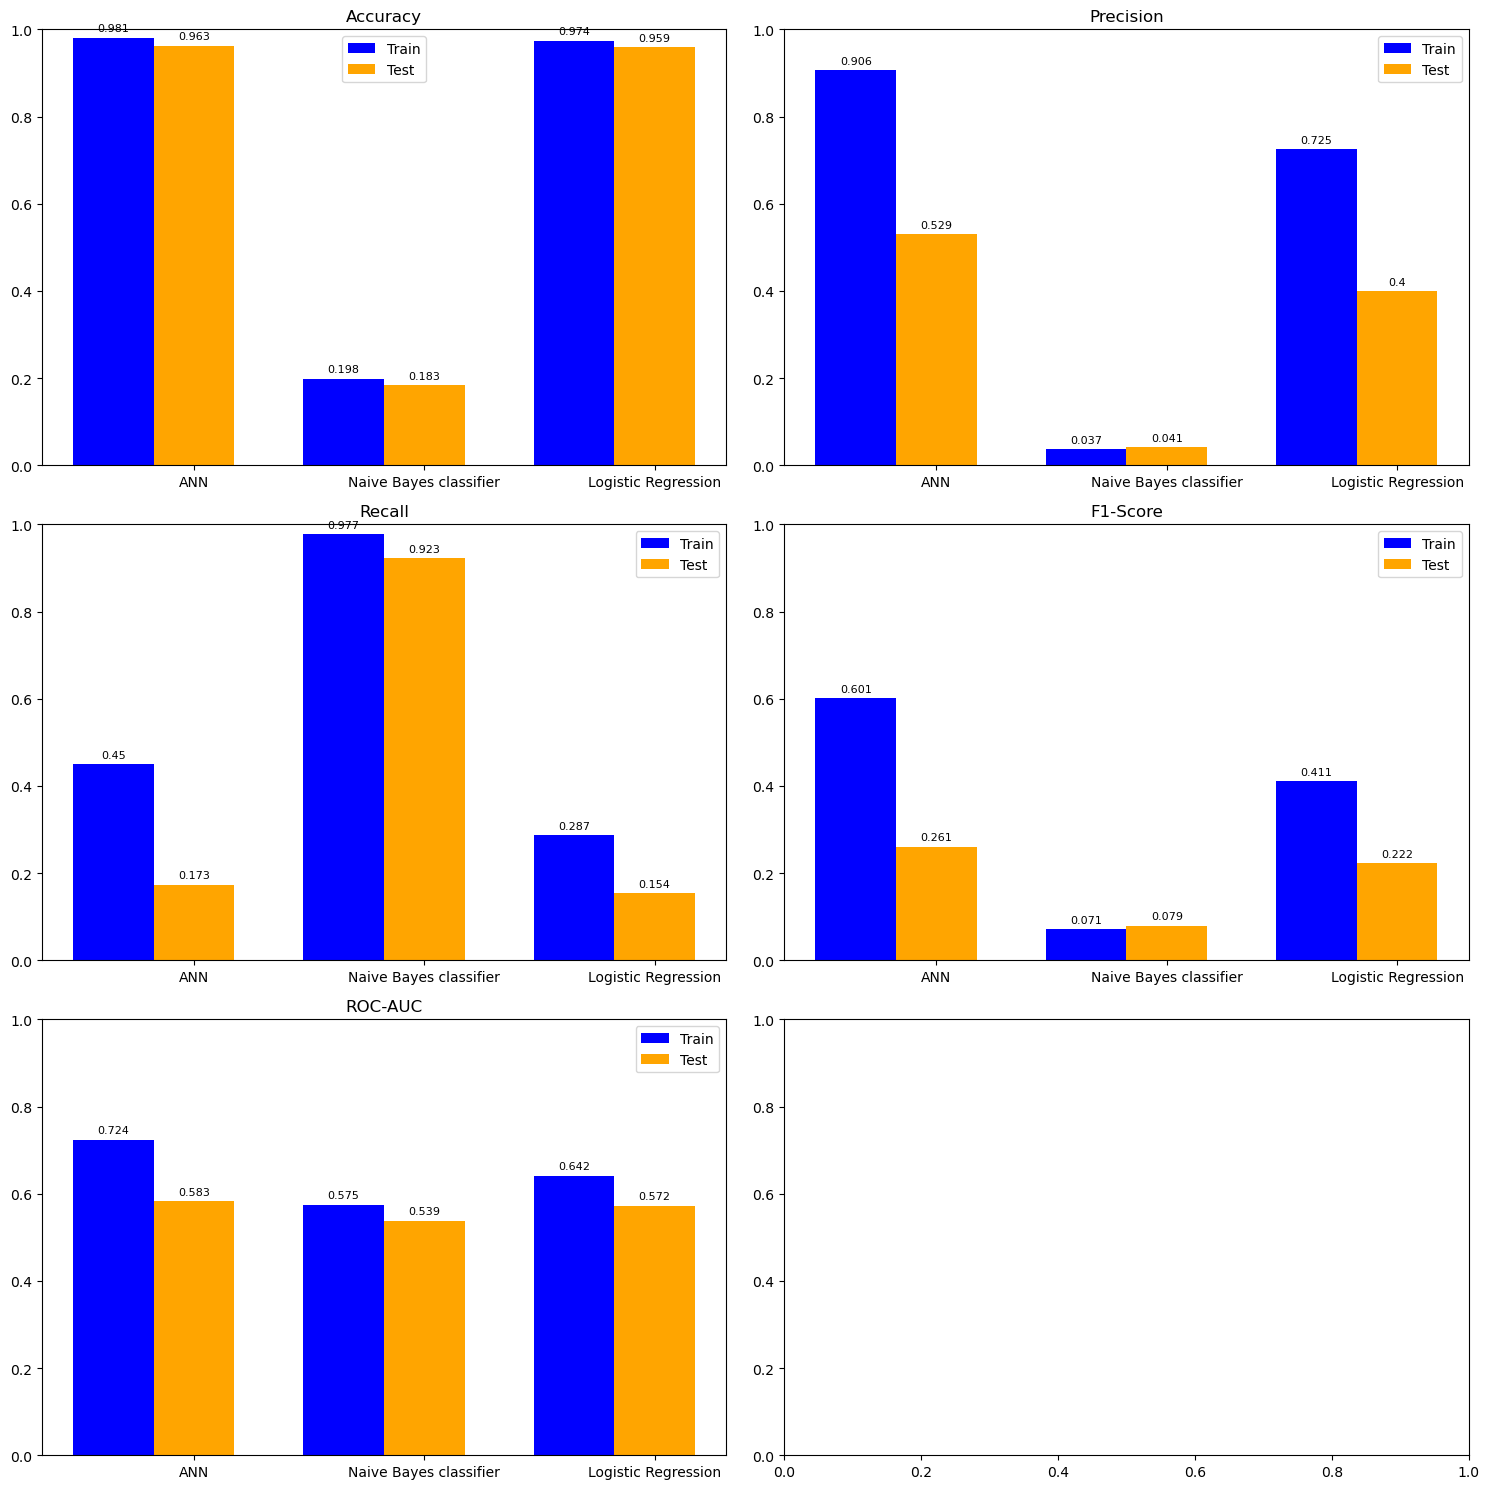

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import matplotlib.pyplot as plt

# Load the datasets from csv files
train_data = pd.read_csv('./default/train_dataset.csv')
valid_data = pd.read_csv('./default/valid_dataset.csv')
test_data = pd.read_csv('./default/test_dataset_1.csv')

# Preprocessing
X_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values.astype(int)
X_val = valid_data.iloc[:, 1:].values
y_val = valid_data.iloc[:, 0].values.astype(int)
X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values.astype(int)

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Compute metrics utility function
def compute_metrics(model, X, y_true, is_neural_net=False):
    if is_neural_net:
        y_pred_probs = model.predict(X)
        y_pred = (y_pred_probs > 0.5).astype("int32").flatten()
    else:
        y_pred = model.predict(X)
    
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    return accuracy, precision, recall, f1, auc

# Function to compute both training and testing metrics for a given model
def get_train_test_metrics(model, is_neural_net=False):
    train_metrics = compute_metrics(model, X_train, y_train, is_neural_net)
    test_metrics = compute_metrics(model, X_test, y_test, is_neural_net)
    return train_metrics, test_metrics

# Naive Bayes Model
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_train_metrics, nb_test_metrics = get_train_test_metrics(nb_classifier)

# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
log_reg_train_metrics, log_reg_test_metrics = get_train_test_metrics(log_reg)

# ANN Model
model = keras.Sequential([
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=2)
ann_train_metrics, ann_test_metrics = get_train_test_metrics(model, is_neural_net=True)

# Plotting metrics
metrics_labels = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]
models = ['ANN', 'Naive Bayes classifier', 'Logistic Regression']
all_train_metrics = np.array([ann_train_metrics, nb_train_metrics, log_reg_train_metrics])
all_test_metrics = np.array([ann_test_metrics, nb_test_metrics, log_reg_test_metrics])

fig, ax = plt.subplots(3, 2, figsize=(15, 15))

bar_width = 0.35
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]


for i, metric in enumerate(metrics_labels):
    ax = plt.subplot(3, 2, i+1)
    bars1 = ax.bar(r1, all_train_metrics[:, i], width=bar_width, label='Train', color='blue')
    bars2 = ax.bar(r2, all_test_metrics[:, i], width=bar_width, label='Test', color='orange')
    
    # Add labels on top of bars
    for bar in bars1:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom', color='black', fontsize=8)
    for bar in bars2:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom', color='black', fontsize=8)

    ax.set_title(metric)
    ax.set_ylim(0, 1)
    ax.set_xticks(r2)
    ax.set_xticklabels(models)
    ax.legend()

plt.tight_layout()
plt.show()
